In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read .csv file
mental_health_df=pd.read_csv('Mental_Health_Dataset.csv', low_memory = False)

mental_health_df = mental_health_df.drop("index",axis=1)

In [3]:
# Rename the columns to something shorter
df_names = {'Entity': 'country',
             'Year' : 'year',
             'Schizophrenia (%)':'schizo', 
             'Bipolar disorder (%)':'bipolar',
             'Eating disorders (%)' : 'eds',
             'Anxiety disorders (%)' : 'anxiety',
             'Drug use disorders (%)':'drug',
             'Depression (%)':'depres',
             'Alcohol use disorders (%)':'alcohol'}

mental_health_df.rename(columns=df_names,inplace=True)
mental_health_df.head()

,country,Code,year,schizo,bipolar,eds,anxiety,drug,depres,alcohol
0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260


In [4]:
# Dropping rows with non-numerical values
mental_health_df.dropna(inplace=True)
mental_health_df

,country,Code,year,schizo,bipolar,eds,anxiety,drug,depres,alcohol
0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260
...,...,...,...,...,...,...,...,...,...,...
6463,Zimbabwe,ZWE,2013,0.15567,0.607993,0.117248,3.090168,0.766280,3.128192,1.515641
6464,Zimbabwe,ZWE,2014,0.155993,0.60861,0.118073,3.093964,0.768914,3.140290,1.515470
6465,Zimbabwe,ZWE,2015,0.156465,0.609363,0.11947,3.098687,0.771802,3.155710,1.514751
6466,Zimbabwe,ZWE,2016,0.157111,0.610234,0.121456,3.104294,0.772275,3.174134,1.513269


In [5]:
# Change the non-numerical object data into floats.
mental_health_df['year'] = pd.to_numeric(mental_health_df['year'])
mental_health_df['schizo'] = pd.to_numeric(mental_health_df['schizo'])
mental_health_df['bipolar'] = pd.to_numeric(mental_health_df['bipolar'])
mental_health_df['eds'] = pd.to_numeric(mental_health_df['eds'])
mental_health_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5488 entries, 0 to 6467
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  5488 non-null   object 
 1   Code     5488 non-null   object 
 2   year     5488 non-null   int64  
 3   schizo   5488 non-null   float64
 4   bipolar  5488 non-null   float64
 5   eds      5488 non-null   float64
 6   anxiety  5488 non-null   float64
 7   drug     5488 non-null   float64
 8   depres   5488 non-null   float64
 9   alcohol  5488 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 471.6+ KB


In [6]:
# Have a quick look at the data through the years for one country
usa = mental_health_df[mental_health_df['Code'] == 'USA']
usa.set_index('year')
usa

,country,Code,year,schizo,bipolar,eds,anxiety,drug,depres,alcohol
6076,United States,USA,1990,0.340897,0.653706,0.468676,6.576884,2.367794,4.677591,2.173751
6077,United States,USA,1991,0.338913,0.653953,0.473575,6.553351,2.345466,4.660871,2.139292
6078,United States,USA,1992,0.337343,0.654205,0.478610,6.536143,2.339515,4.651949,2.107931
6079,United States,USA,1993,0.336207,0.654431,0.483539,6.525536,2.347095,4.648701,2.080669
6080,United States,USA,1994,0.335536,0.654620,0.488235,6.522278,2.365738,4.649294,2.058632
6081,United States,USA,1995,0.335363,0.654721,0.492368,6.526489,2.392582,4.650869,2.042931
6082,United States,USA,1996,0.335806,0.654749,0.496752,6.578023,2.456048,4.662902,2.033987
6083,United States,USA,1997,0.336797,0.654720,0.501560,6.688847,2.564591,4.689154,2.030590
6084,United States,USA,1998,0.338085,0.654658,0.506483,6.818473,2.688823,4.720716,2.031176
6085,United States,USA,1999,0.339410,0.654564,0.511072,6.926351,2.800595,4.749991,2.034175


<Axes: title={'center': 'Prevalence of Various Mental Heath Diagnosis in the USA'}, xlabel='Year', ylabel='Prevalence (%)'>

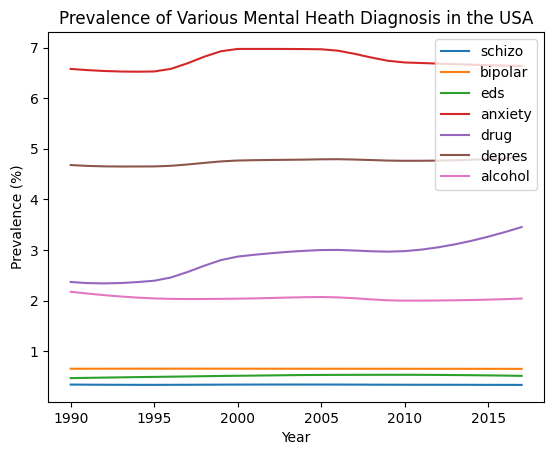

In [7]:
# Plot the data
usa.plot(x='year', title = 'Prevalence of Various Mental Heath Diagnosis in the USA', xlabel = 'Year', ylabel = 'Prevalence (%)')